### MALIGNANT COMMENTS CLASSIFICATION


#### Problem Statement


The proliferation of social media enables people to express their opinions widely online. However, at the same time, this has resulted in the emergence of conflict and hate, making online environments uninviting for users. Although researchers have found that hate is a problem across multiple platforms, there is a lack of models for online hate detection. Online hate, described as abusive language, aggression, cyberbullying, hatefulness and many others has been identified as a major threat on online social media platforms. Social media platforms are the most prominent grounds for such toxic behaviour.

There has been a remarkable increase in the cases of cyberbullying and trolls on various social media platforms. Many celebrities and influences are facing backlashes from people and have to come across hateful and offensive comments. This can take a toll on anyone and affect them mentally leading to depression, mental illness, self-hatred and suicidal thoughts.
Internet comments are bastions of hatred and vitriol. While online anonymity has provided a new outlet for aggression and hate speech, machine learning can be used to fight it. The problem we sought to solve was the tagging of internet comments that are aggressive towards other users. This means that insults to third parties such as celebrities will be tagged as unoffensive, but “u are an idiot” is clearly offensive.

Our goal is to build a prototype of online hate and abuse comment classifier which can used to classify hate and offensive comments so that it can be controlled and restricted from spreading hatred and cyberbullying.

### Data Set Description


The data set contains the training set, which has approximately 1,59,000 samples and the test set which contains nearly 1,53,000 samples. All the data samples contain 8 fields which includes ‘Id’, ‘Comments’, ‘Malignant’, ‘Highly malignant’, ‘Rude’, ‘Threat’, ‘Abuse’ and ‘Loathe’.

The label can be either 0 or 1, where 0 denotes a NO while 1 denotes a YES. There are various comments which have multiple labels. The first attribute is a unique ID associated with each comment.

The data set includes:

Malignant: It is the Label column, which includes values 0 and 1, denoting if the comment is malignant or not.

Highly Malignant: It denotes comments that are highly malignant and hurtful.

Rude: It denotes comments that are very rude and offensive.

Threat: It contains indication of the comments that are giving any threat to someone.

Abuse: It is for comments that are abusive in nature.

Loathe: It describes the comments which are hateful and loathing in nature.

ID: It includes unique Ids associated with each comment text given.

Comment text: This column contains the comments extracted from various social media platforms.

This project is more about exploration, feature engineering and classification that can be done on this data. Since the data set is huge and includes many categories of comments, we can do good amount of data exploration and derive some interesting features using the comments text column available.

You need to build a model that can differentiate between comments and its categories.

### Importing Libraries


In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing  import power_transform, StandardScaler, LabelEncoder
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score,classification_report, confusion_matrix, plot_roc_curve
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier

import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import gensim
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer

import pickle
import warnings
warnings.filterwarnings('ignore')

### Importing the DATASET


In [18]:
comments_train1=pd.read_csv("train1.csv")

In [19]:
comments_test=pd.read_csv("test.csv")


In [21]:
comments_train1.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [22]:
comments_test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


### Checking Total Numbers of Rows and Column


In [23]:
comments_train1.shape

(159571, 8)

In [24]:
comments_test.shape

(153164, 2)

In [25]:
comments_train1.columns

Index(['id', 'comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe'],
      dtype='object')

In [26]:
comments_test.columns

Index(['id', 'comment_text'], dtype='object')

In [27]:
comments_train1.dtypes

id                  object
comment_text        object
malignant            int64
highly_malignant     int64
rude                 int64
threat               int64
abuse                int64
loathe               int64
dtype: object

In [28]:
comments_test.dtypes

id              object
comment_text    object
dtype: object

### Checking for Null Values

In [29]:
comments_train1.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

In [30]:
comments_test.isnull().sum()

id              0
comment_text    0
dtype: int64

### Checking for Null Values through heatmap


<AxesSubplot:>

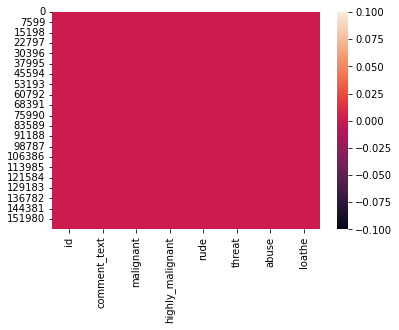

In [31]:
sns.heatmap(comments_train1.isnull())

<AxesSubplot:>

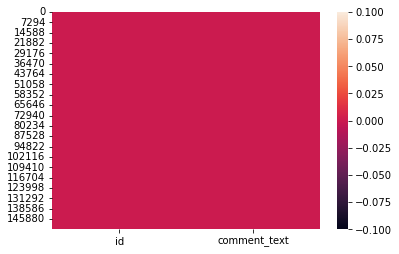

In [32]:
sns.heatmap(comments_test.isnull())

### Information about Data (Memory Used and Data Types)

In [33]:
comments_train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [34]:
comments_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            153164 non-null  object
 1   comment_text  153164 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


### Checking for ? values if present in our dataset or not

In [35]:
(comments_train1=='?').sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

In [36]:
(comments_test=='?').sum()

id              0
comment_text    0
dtype: int64

### Checking total count of unique elements of each columns

In [37]:
comments_train1.nunique()

id                  159571
comment_text        159570
malignant                2
highly_malignant         2
rude                     2
threat                   2
abuse                    2
loathe                   2
dtype: int64

In [38]:
comments_test.nunique()

id              153164
comment_text    153164
dtype: int64

### Checking unique values present in the columns :
"malignant", "highly_malignant", "rude", "threat", "abuse", "loathe"

In [39]:
comment_columns= ["malignant", "highly_malignant", "rude", "threat", "abuse", "loathe"]
for i in comments_train[comment_columns]:
    print(i, comments_train[i].unique(),"\n")

malignant [0 1] 

highly_malignant [0 1] 

rude [0 1] 

threat [0 1] 

abuse [0 1] 

loathe [0 1] 



### Descriptive Statistics


In [40]:
# Description of comments_train Dataset : works only on continuous column 
comments_train1.describe()

,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Checking Description through heatmap

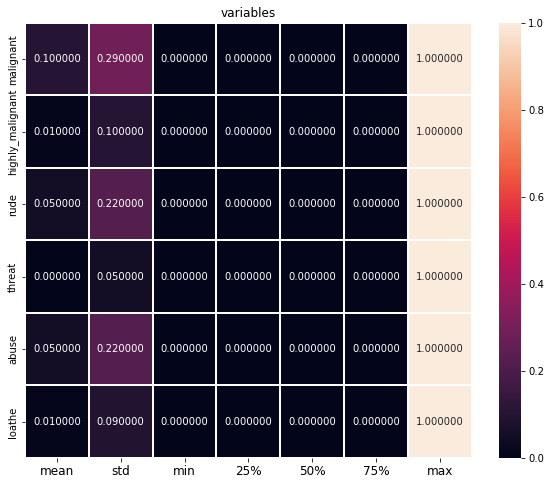

In [41]:
plt.figure(figsize=(10,8))
sns.heatmap(round(comments_train.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt='f')
plt.xticks(fontsize=18)
plt.xticks(fontsize=12)
plt.title('variables')
plt.show()

### Observation:
    - We can see total count is 159571.000000 of each columns which shows there is no null values.
    - Total rows are 159571
    - Total continuous columns are: 6 and categorical column are: 2
    - Std deviation is more than mean
    - All percentile difference is 0
We wil not check description of datset as it Works only on continuous data and this dataset contains categorical data.


### Data Cleaning

In [42]:
#dropping column "id" as this column contains unique value which is not relevant for prediction
comments_train1.drop("id",axis=1,inplace=True)

In [43]:
#dropping column "id" as this column contains unique value which is not relevant for prediction
comments_test.drop("id",axis=1,inplace=True)

### Data Visualization

#### Univariate Analysis

#### Using Countplot

0    144277
1     15294
Name: malignant, dtype: int64


<AxesSubplot:xlabel='malignant', ylabel='count'>

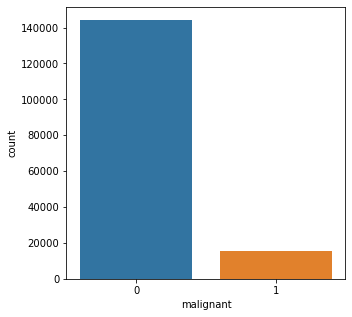

In [44]:
print(comments_train1['malignant'].value_counts())
plt.figure(figsize=(5,5))
sns.countplot('malignant', data=comments_train)

#### We can observe that Total no of 15294 is Malignant Comment and Total no of 144277 is not Malignant Comment.


0    157976
1      1595
Name: highly_malignant, dtype: int64


<AxesSubplot:xlabel='highly_malignant', ylabel='count'>

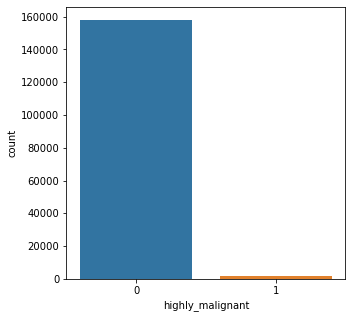

In [45]:
print(comments_train1['highly_malignant'].value_counts())
plt.figure(figsize=(5,5))
sns.countplot('highly_malignant', data=comments_train)

#### We can observe that Total no of 1595 is highly_malignant Comment and Total no of 157976 is not highly_malignant Comment.


0    151122
1      8449
Name: rude, dtype: int64


<AxesSubplot:xlabel='rude', ylabel='count'>

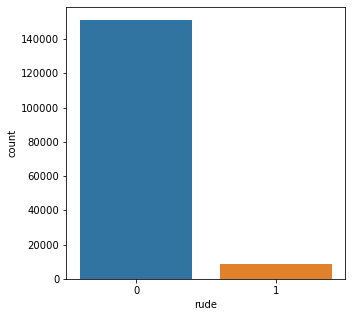

In [46]:
print(comments_train1['rude'].value_counts())
plt.figure(figsize=(5,5))
sns.countplot('rude', data=comments_train1)

#### We can observe that Total no of 8449 is rude Comment and Total no of 151122 is not rude Comment.


0    159093
1       478
Name: threat, dtype: int64


<AxesSubplot:xlabel='threat', ylabel='count'>

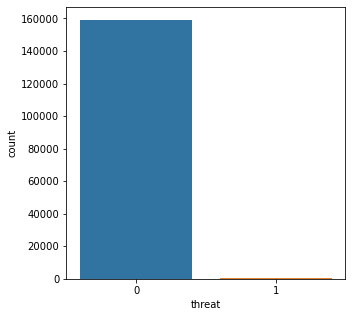

In [47]:
print(comments_train1['threat'].value_counts())
plt.figure(figsize=(5,5))
sns.countplot('threat', data=comments_train1)

#### We can observe that Total no of 478 is threat Comment and Total no of 159093 is not threat Comment.


0    151694
1      7877
Name: abuse, dtype: int64


<AxesSubplot:xlabel='abuse', ylabel='count'>

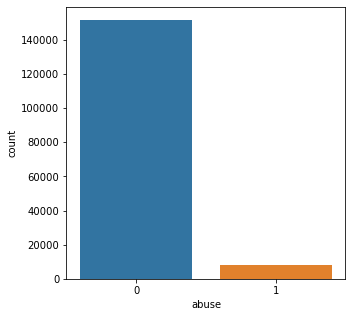

In [48]:
print(comments_train1['abuse'].value_counts())
plt.figure(figsize=(5,5))
sns.countplot('abuse', data=comments_train1)

#### We can observe that Total no of 7877 is abuse Comment and Total no of 151694 is not abuse Comment.


0    158166
1      1405
Name: loathe, dtype: int64


<AxesSubplot:xlabel='loathe', ylabel='count'>

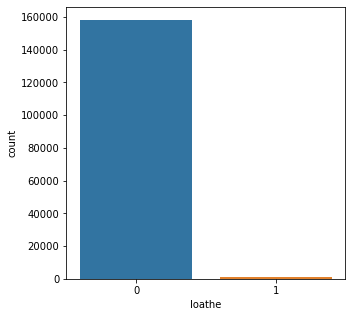

In [49]:
print(comments_train1['loathe'].value_counts())
plt.figure(figsize=(5,5))
sns.countplot('loathe', data=comments_train1)

#### We can observe that Total no of 1405 is loathe Comment and Total no of 158166 is not loathe Comment.


### Bivariate Analysis

#### Using Barplot

<AxesSubplot:xlabel='malignant', ylabel='threat'>

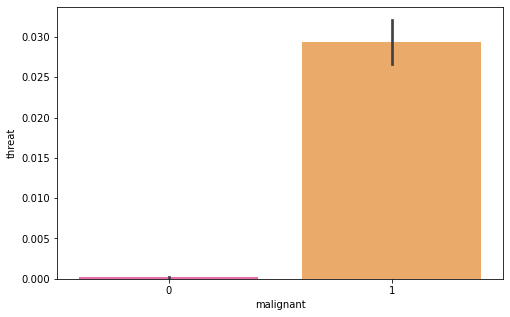

In [50]:
plt.figure(figsize=(8,5))
sns.barplot(x='malignant',y='threat',data= comments_train1, palette='spring')

#### We can observe that malignant with threat Comment is most.


<AxesSubplot:xlabel='threat', ylabel='highly_malignant'>

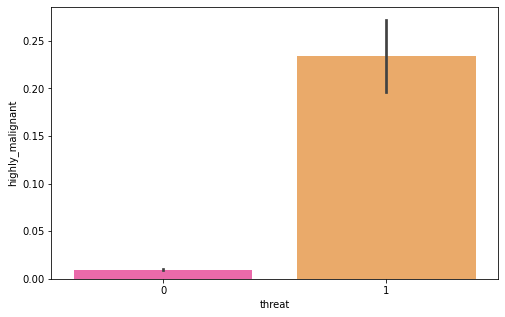

In [51]:
plt.figure(figsize=(8,5))
sns.barplot(x='threat',y='highly_malignant',data= comments_train1, palette='spring')

#### We can observe that highly_malignant with threat Comment is most.


<AxesSubplot:xlabel='rude', ylabel='threat'>

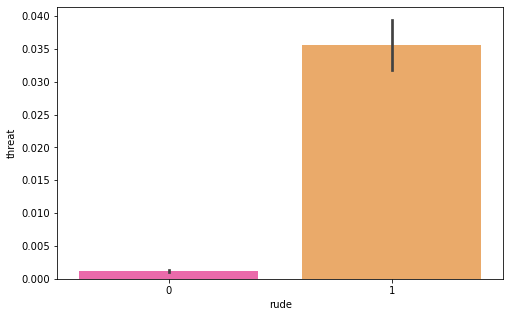

In [52]:
plt.figure(figsize=(8,5))
sns.barplot(x='rude',y='threat',data= comments_train1, palette='spring')

We can observe that rude with threat comment is most.


<AxesSubplot:xlabel='abuse', ylabel='loathe'>

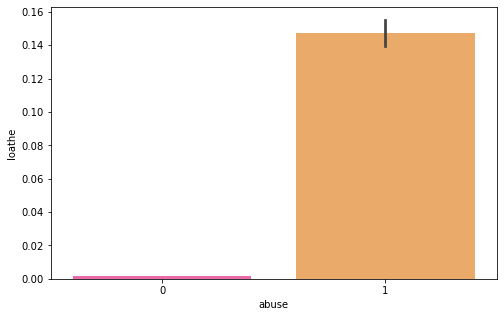

In [53]:
plt.figure(figsize=(8,5))
sns.barplot(x='abuse',y='loathe',data= comments_train1, palette='spring')

We can observe that abuse with loathe comment is most.


### Multivariate Analysis

##### Using Pie-plot

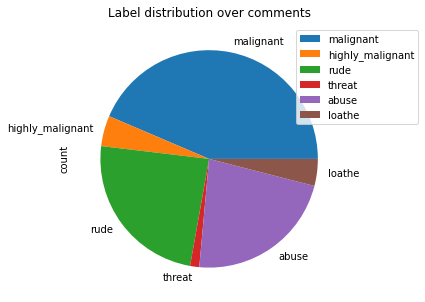

In [54]:
#checking how which comment fall under which category
cols = ['malignant','highly_malignant','rude','threat','abuse','loathe']
df_plot = comments_train1[cols].sum().to_frame().rename(columns={0: 'count'})
df_plot.plot.pie(y='count',title='Label distribution over comments',figsize=(5, 5)).legend(loc='center left', bbox_to_anchor=(0.8, 0.8))

We can observe that total distribution of all comment's type in which we can see malignant comments are most and threat comments are least.


### Using Pairplot


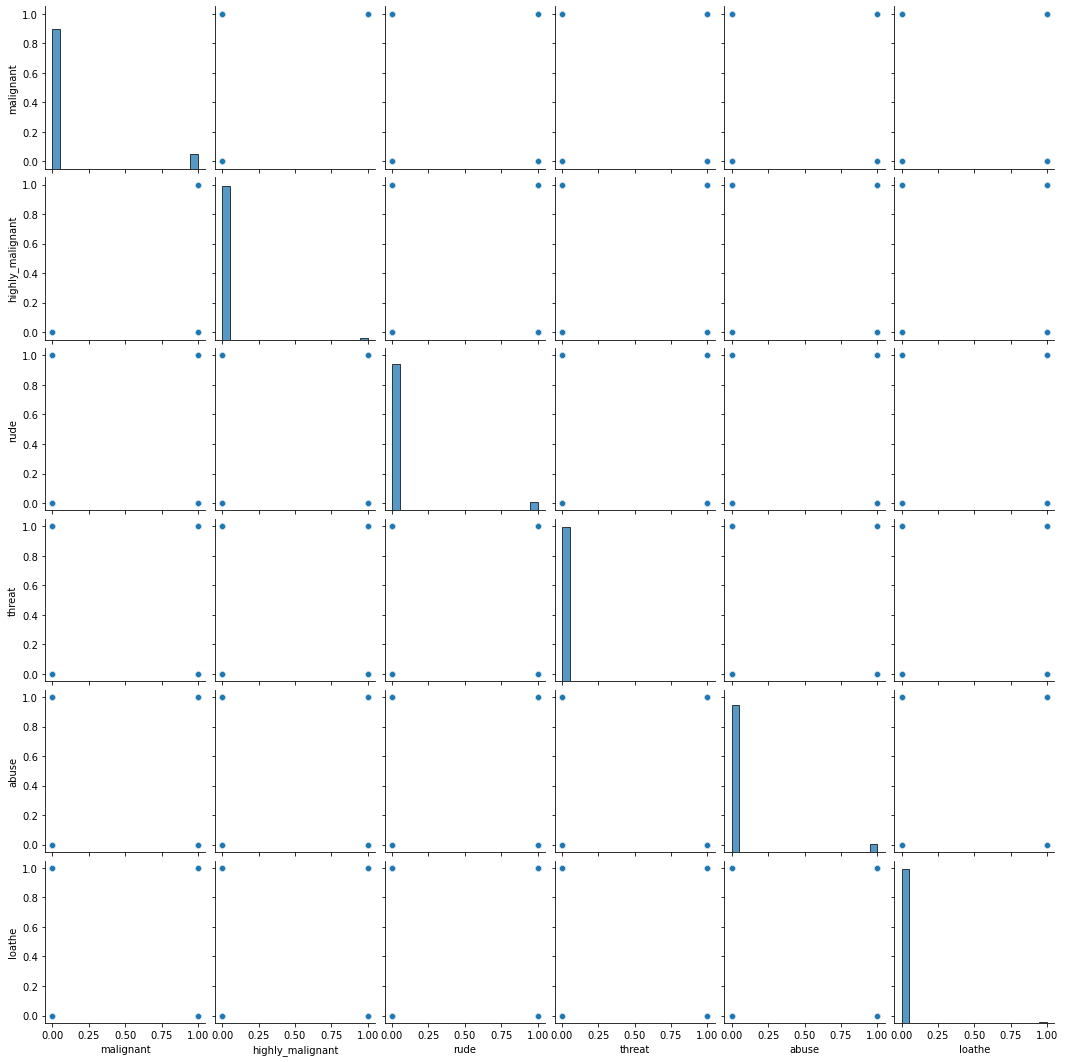

In [55]:
sns.pairplot(comments_train)

We can observe relationship between all the continuous column.


### Checking Correlation


In [56]:
comments_train.corr()

,malignant,highly_malignant,rude,threat,abuse,loathe
malignant,1.000000,0.308619,0.676515,0.157058,0.647518,0.266009
highly_malignant,0.308619,1.000000,0.403014,0.123601,0.375807,0.201600
rude,0.676515,0.403014,1.000000,0.141179,0.741272,0.286867
threat,0.157058,0.123601,0.141179,1.000000,0.150022,0.115128
abuse,0.647518,0.375807,0.741272,0.150022,1.000000,0.337736
loathe,0.266009,0.201600,0.286867,0.115128,0.337736,1.000000


### Checking correlation with heatmap


<AxesSubplot:>

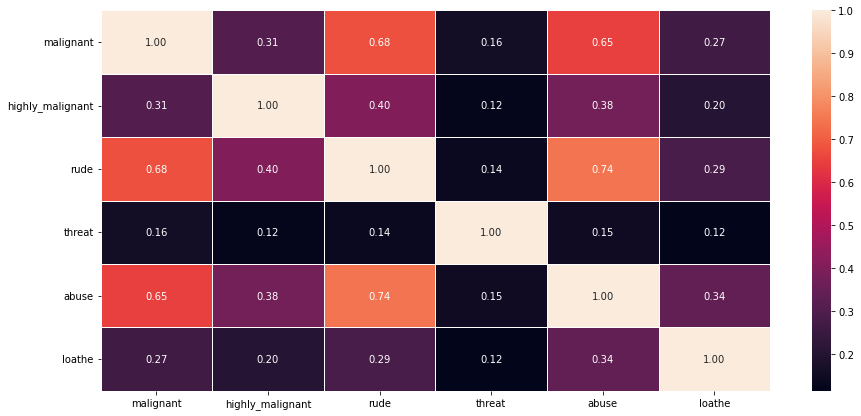

In [57]:
plt.figure(figsize=(15,7))
sns.heatmap(comments_train.corr(),annot=True, linewidth=0.5, linecolor='white', fmt='.2f')

#### Outcome of Correlation:
malignant and highly_malignant has 31 percent correlation with each other and positively correlated.
highly_malignant and rude has 40 percent correlation with each other and positively correlated.
rude and threat has 14 percent correlation with each other and positively correlated.
threat and abuse has 15 percent correlation with each other and positively correlated.
abuse and loathe has 34 percent correlation with each other and positively correlated.
Max correlation is between highly_malignant and rude
Min correlation is between rude and threat

In [58]:
cmnt_train=comments_train1.copy()

### Data preprocessing

"cmnt_train" Dataset

In [60]:
cmnt_train['length'] = cmnt_train['comment_text'].str.len()

In [61]:
# Convert all messages to lower case
cmnt_train['comment_text'] = cmnt_train['comment_text'].str.lower()

In [62]:
# Replace email addresses with 'email'
cmnt_train['comment_text'] = cmnt_train['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                                                    'emailaddress')

In [63]:
# Replace URLs with 'webaddress'
cmnt_train['comment_text'] = cmnt_train['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$', 
                                                                    'webaddress')

In [64]:
# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
cmnt_train['comment_text'] = cmnt_train['comment_text'].str.replace(r'£|\$', 'dollers')

In [65]:
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
cmnt_train['comment_text'] = cmnt_train['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$', 
                                                                    'phonenumber')

In [66]:
# Replace numbers with 'numbr'
cmnt_train['comment_text'] = cmnt_train['comment_text'].str.replace(r'\d+(\.\d+)?', 
                                                                    'numbr')

In [67]:
#remove  punctation
cmnt_train["comment_text"]=cmnt_train["comment_text"].str.replace(r'[^\w\d\s]'," ")

In [68]:
# replace extra space
cmnt_train["comment_text"]=cmnt_train["comment_text"].str.replace(r'^\s+'," ")

In [69]:
#replacing leadning and trailing white space
cmnt_train["comment_text"]=cmnt_train["comment_text"].str.replace(r'^\s+|\s+?$', "")

In [70]:
#removing \n
cmnt_train["comment_text"]=cmnt_train["comment_text"].str.replace("\n"," ")

In [71]:
cmnt_train['comment_text'] = cmnt_train['comment_text'].apply(lambda x: ' '.join
                                                              (term for term in x.split() if term not in string.punctuation))

In [75]:
cmnt_train['clean_length'] = cmnt_train.comment_text.str.len()
cmnt_train.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length,clean_length
0,explanation why the edits made under my userna...,0,0,0,0,0,0,264,260
1,d aww he matches this background colour i m se...,0,0,0,0,0,0,112,112
2,hey man i m really not trying to edit war it s...,0,0,0,0,0,0,233,229
3,more i can t make any real suggestions on impr...,0,0,0,0,0,0,622,601
4,you sir are my hero any chance you remember wh...,0,0,0,0,0,0,67,63


In [88]:
cmnt_train["label"]= cmnt_train["malignant"] | cmnt_train["highly_malignant"] | cmnt_train["rude"] | cmnt_train["threat"] | cmnt_train["abuse"] | cmnt_train["loathe"]


In [89]:
# Total length removal
print ('Origian Length', cmnt_train.length.sum())
print ('Clean Length', cmnt_train.clean_length.sum())

Origian Length 62797450
Clean Length 60449301


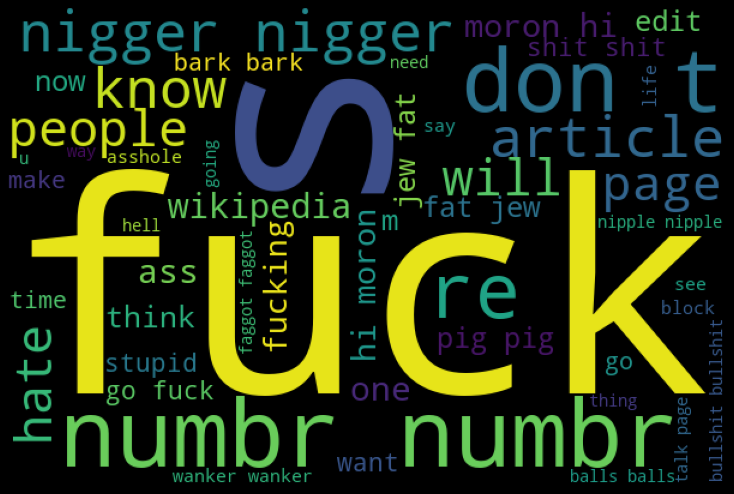

In [90]:
# seeing the word which are offensive
from wordcloud import WordCloud

malignant=cmnt_train["comment_text"][cmnt_train["label"]==1]

malign_cloud= WordCloud(width=600,height=400,background_color="black",max_words=50).generate(" ".join(malignant))

plt.figure(figsize=(10,8),facecolor="k")
plt.imshow(malign_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

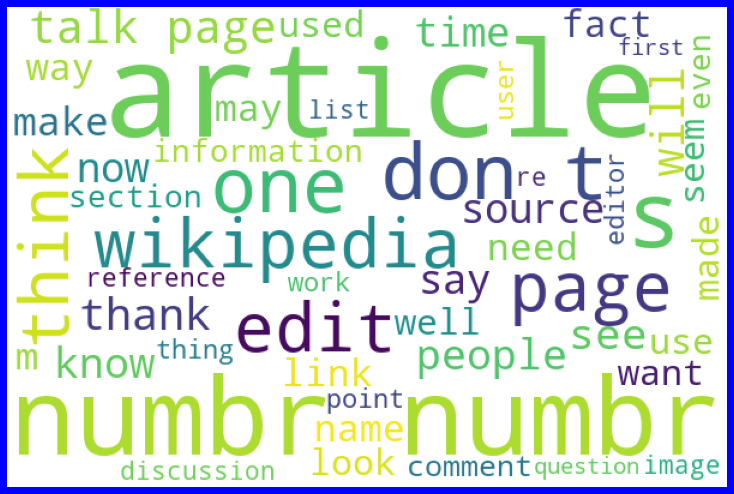

In [92]:
# seeing the word which are not offensive
from wordcloud import WordCloud

non_malignant=cmnt_train["comment_text"][cmnt_train["label"]==0]

malign_cloud= WordCloud(width=600,height=400,background_color="white",max_words=50).generate(" ".join(non_malignant))

plt.figure(figsize=(10,8),facecolor="b")
plt.imshow(malign_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [93]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [94]:
#Convert text into vectors using TF-IDF
tf_vec = TfidfVectorizer(max_features = 10000, stop_words='english')
features = tf_vec.fit_transform(cmnt_train['comment_text'])
x = features
y=cmnt_train['label']

#### "cmnt_test" Dataset


In [95]:
cmnt_test= comments_test.copy()

In [96]:
cmnt_test["comment_text"] = cmnt_test["comment_text"].str.lower()

In [97]:
cmnt_test["length"] = cmnt_test["comment_text"].str.len() 

In [98]:
#replacing with email address
cmnt_test["comment_text"]= cmnt_test["comment_text"].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',"emailaddress")

In [99]:
#replacing with web address                                                   
cmnt_test["comment_text"]= cmnt_test["comment_text"].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\s*)?$',
                                                                 "webaddress")

In [100]:
#replacing with number
cmnt_test["comment_text"]= cmnt_test["comment_text"].str.replace(r'\d+(\.\d+)?',"number")

In [101]:
#remove  punctation
cmnt_test["comment_text"]=cmnt_test["comment_text"].str.replace(r'[^\w\d\s]'," ")

In [102]:
# replace extra space
cmnt_test["comment_text"]=cmnt_test["comment_text"].str.replace(r'^\s+'," ")

In [103]:
#replacing leading and trailing white space
cmnt_test["comment_text"]=cmnt_test["comment_text"].str.replace(r'^\s+|\s+?$', "")

In [104]:
#replacing with\n
cmnt_test["comment_text"]=cmnt_test["comment_text"].str.replace("\n"," ")

In [108]:
cmnt_test["clean_cmnt_test"] = cmnt_test["comment_text"].str.len() 
cmnt_test.head()

,comment_text,length,clean_cmnt_test
0,yo bitch ja rule is more succesful then you ll...,367,365
1,from rfc the title is fine as it is imo,50,46
2,sources zawe ashton on lapland,54,38
3,if you have a look back at the source the inf...,205,203
4,i don t anonymously edit articles at all,41,40


In [109]:
print('original length',cmnt_test.length.sum())
print('cleaned length',cmnt_test.clean_cmnt_test.sum())

original length 55886104
cleaned length 55520485


In [110]:
cmnt_train.shape

(159571, 10)

In [111]:
cmnt_test.shape

(153164, 3)

### Creating Model

##### We are using Classification Algorithm

In [112]:
# creating new train test split using the random state.
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=70)

In [113]:
x.shape, y.shape


((159571, 10000), (159571,))

In [114]:
x_train.shape,y_train.shape, x_test.shape,y_test.shape

((111699, 10000), (111699,), (47872, 10000), (47872,))

We can see the x.shape value is divided into x_train.shape and x_test.shape and like this y.shape is also divided. We will understand this by Classification problem.

### 1. Logistic Regression

In [115]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)

print("accuracy_score: ", accuracy_score(y_test, pred_lr))
print("confusion_matrix: \n", confusion_matrix(y_test, pred_lr))
print("classification_report: \n", classification_report(y_test,pred_lr))

accuracy_score:  0.9561121323529411
confusion_matrix: 
 [[42792   235]
 [ 1866  2979]]
classification_report: 
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     43027
           1       0.93      0.61      0.74      4845

    accuracy                           0.96     47872
   macro avg       0.94      0.80      0.86     47872
weighted avg       0.96      0.96      0.95     47872



### Confusion Matrix for Logistic Regression


Text(0.5, 1.0, 'Logistic regressor prediction Confusion_matrix')

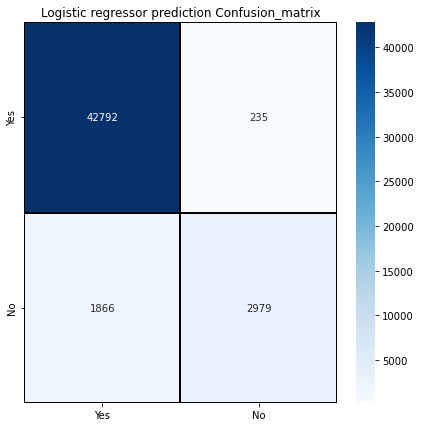

In [116]:
cm = confusion_matrix(y_test,pred_lr)
x_axis_labels = ["Yes","No"]
y_axis_labels = ["Yes","No"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues", 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)
plt.title("Logistic regressor prediction Confusion_matrix")

### 2. AdaBoost Classifier


In [117]:
abc = AdaBoostClassifier()
abc.fit(x_train,y_train)
pred_abc = abc.predict(x_test)

print("accuracy_score: ",accuracy_score(y_test, pred_abc))
print("confusion_matrix: \n",confusion_matrix(y_test, pred_abc))
print("classification_report: \n",classification_report(y_test,pred_abc))

accuracy_score:  0.9470254010695187
confusion_matrix: 
 [[42650   377]
 [ 2159  2686]]
classification_report: 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     43027
           1       0.88      0.55      0.68      4845

    accuracy                           0.95     47872
   macro avg       0.91      0.77      0.83     47872
weighted avg       0.94      0.95      0.94     47872



### Confusion Matrix for AdaBoost Classifier


Text(0.5, 1.0, 'AdaBoost Classifier prediction Confusion_matrix')

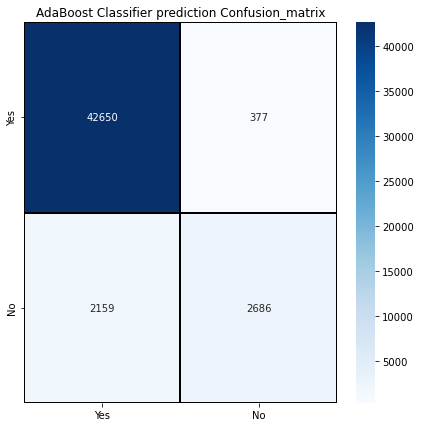

In [118]:
cm = confusion_matrix(y_test,pred_abc)
x_axis_labels = ["Yes","No"]
y_axis_labels = ["Yes","No"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues", 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)
plt.title("AdaBoost Classifier prediction Confusion_matrix")

### 3. Decision Tree Classifier


In [119]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred_dtc = dtc.predict(x_test)

print("accuracy_score: ",accuracy_score(y_test, pred_dtc))
print("confusion_matrix: \n",confusion_matrix(y_test, pred_dtc))
print("classification_report: \n",classification_report(y_test,pred_dtc))

accuracy_score:  0.9405497994652406
confusion_matrix: 
 [[41641  1386]
 [ 1460  3385]]
classification_report: 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97     43027
           1       0.71      0.70      0.70      4845

    accuracy                           0.94     47872
   macro avg       0.84      0.83      0.84     47872
weighted avg       0.94      0.94      0.94     47872



### Confusion Matrix for Decision Tree Classifier


Text(0.5, 1.0, 'DTC prediction Confusion_matrix')

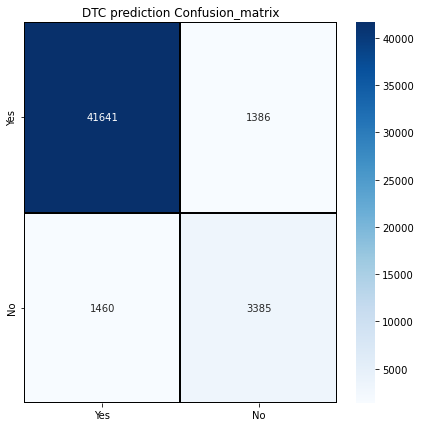

In [120]:
cm = confusion_matrix(y_test,pred_dtc)
x_axis_labels = ["Yes","No"]
y_axis_labels = ["Yes","No"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues", 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)
plt.title("DTC prediction Confusion_matrix")

### 4. KNN Classifier


In [121]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
pred_knn = knn.predict(x_test)

print("accuracy_score: ",accuracy_score(y_test, pred_knn))
print("confusion_matrix: \n",confusion_matrix(y_test, pred_knn))
print("classification_report: \n",classification_report(y_test,pred_knn))

accuracy_score:  0.9121615975935828
confusion_matrix: 
 [[42362   665]
 [ 3540  1305]]
classification_report: 
               precision    recall  f1-score   support

           0       0.92      0.98      0.95     43027
           1       0.66      0.27      0.38      4845

    accuracy                           0.91     47872
   macro avg       0.79      0.63      0.67     47872
weighted avg       0.90      0.91      0.90     47872



### Confusion Matrix for KNN


Text(0.5, 1.0, 'KNN prediction Confusion_matrix')

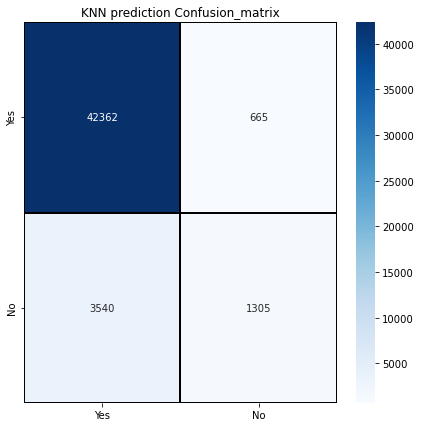

In [122]:
cm = confusion_matrix(y_test,pred_knn)
x_axis_labels = ["Yes","No"]
y_axis_labels = ["Yes","No"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues", 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)
plt.title("KNN prediction Confusion_matrix")

### 5. Gradient Boosting Classifier


In [123]:
gb = GradientBoostingClassifier(n_estimators =100,learning_rate=0.1, max_depth=4)
gb.fit(x_train,y_train)
pred_gb = gb.predict(x_test)

print("accuracy_score: ",accuracy_score(y_test, pred_gb))
print("confusion_matrix: \n",confusion_matrix(y_test, pred_gb))
print("classification_report: \n",classification_report(y_test,pred_gb))

accuracy_score:  0.9429102606951871
confusion_matrix: 
 [[42887   140]
 [ 2593  2252]]
classification_report: 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97     43027
           1       0.94      0.46      0.62      4845

    accuracy                           0.94     47872
   macro avg       0.94      0.73      0.80     47872
weighted avg       0.94      0.94      0.93     47872



### Confusion Matrix for Gradient Boosting classifier


Text(0.5, 1.0, 'Gradient Boosting classifier prediction Confusion_matrix')

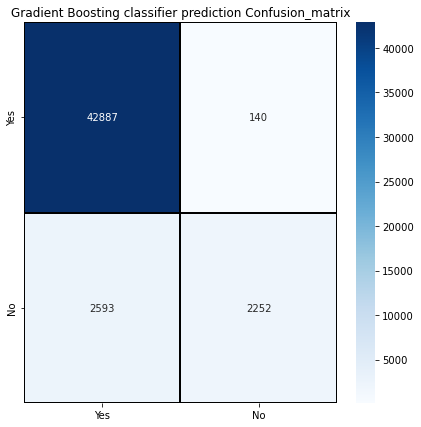

In [124]:
cm = confusion_matrix(y_test,pred_gb)
x_axis_labels = ["Yes","No"]
y_axis_labels = ["Yes","No"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues", 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)
plt.title("Gradient Boosting classifier prediction Confusion_matrix")

### 6. XGB Classifier


In [125]:
XGBC= XGBClassifier()
XGBC.fit(x_train,y_train)
pred_XGBC = XGBC.predict(x_test)

print("accuracy_score: ",accuracy_score(y_test, pred_XGBC))
print("confusion_matrix: \n",confusion_matrix(y_test, pred_XGBC))
print("classification_report: \n",classification_report(y_test,pred_XGBC))

accuracy_score:  0.9541485628342246
confusion_matrix: 
 [[42767   260]
 [ 1935  2910]]
classification_report: 
               precision    recall  f1-score   support

           0       0.96      0.99      0.97     43027
           1       0.92      0.60      0.73      4845

    accuracy                           0.95     47872
   macro avg       0.94      0.80      0.85     47872
weighted avg       0.95      0.95      0.95     47872



### Confusion Matrix for XGB Classifier


Text(0.5, 1.0, 'XGB Classifier prediction Confusion_matrix')

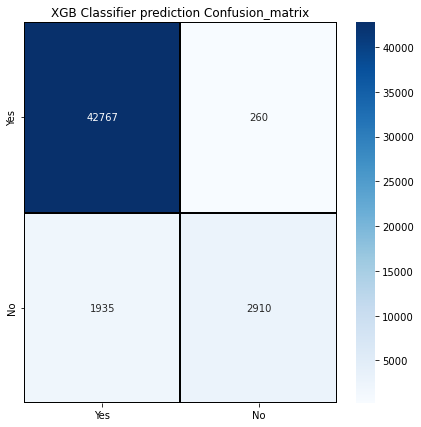

In [126]:
cm = confusion_matrix(y_test,pred_XGBC)
x_axis_labels = ["Yes","No"]
y_axis_labels = ["Yes","No"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues", 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)
plt.title("XGB Classifier prediction Confusion_matrix")

### 7. MultinomialNB


In [127]:
MNB= MultinomialNB()
MNB.fit(x_train,y_train)
pred_MNB = MNB.predict(x_test)

print("accuracy_score: ",accuracy_score(y_test, pred_MNB))
print("confusion_matrix: \n",confusion_matrix(y_test, pred_MNB))
print("classification_report: \n",classification_report(y_test,pred_MNB))

accuracy_score:  0.9491560828877005
confusion_matrix: 
 [[42848   179]
 [ 2255  2590]]
classification_report: 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97     43027
           1       0.94      0.53      0.68      4845

    accuracy                           0.95     47872
   macro avg       0.94      0.77      0.83     47872
weighted avg       0.95      0.95      0.94     47872



### Confusion Matrix for XGB Classifier


Text(0.5, 1.0, 'MultinomialNB prediction Confusion_matrix')

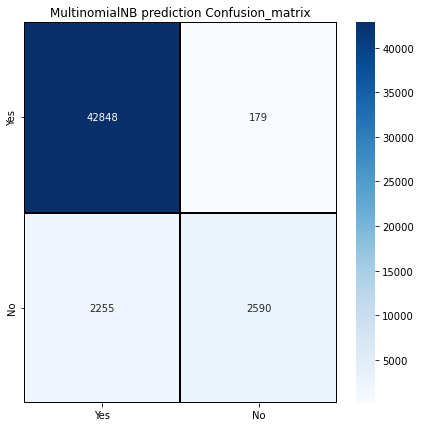

In [128]:
cm = confusion_matrix(y_test,pred_MNB)
x_axis_labels = ["Yes","No"]
y_axis_labels = ["Yes","No"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues", 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)
plt.title("MultinomialNB prediction Confusion_matrix")

### Cross Validation Score for all the model


In [129]:
#CV Score for Logistic Regression
print('CV score for Logistic Regression: ',cross_val_score(lr,x,y,cv=5).mean())

CV score for Logistic Regression:  0.9560634429060688


In [130]:
#CV Score for AdaBoost Classifier
print('CV score for AdaBoost Classifier: ',cross_val_score(abc,x,y,cv=5).mean())

CV score for AdaBoost Classifier:  0.9456104142329635


In [131]:
#CV Score for Decision Tree Classifier
print('CV score for Decision Tree Classifier: ',cross_val_score(dtc,x,y,cv=5).mean())

CV score for Decision Tree Classifier:  0.9415620638620765


In [132]:
#CV Score for KNN Classifier
print('CV score for KNN Classifier: ',cross_val_score(knn,x,y,cv=5).mean())

CV score for KNN Classifier:  0.9130481002175564


In [133]:
#CV Score for Gradient Boosting Classifier
print('CV score for Gradient Boosting Classifier: ',cross_val_score(gb,x,y,cv=5).mean())

CV score for Gradient Boosting Classifier:  0.9425647562478712


In [134]:
#CV Score for XGB Classifier
print('CV score for XGB Classifier: ',cross_val_score(XGBC,x,y,cv=5).mean())

CV score for XGB Classifier:  0.9533373875864942


In [135]:
#CV Score for MultinomialNB Classifier
print('CV score for MultinomialNB: ',cross_val_score(MNB,x,y,cv=5).mean())

CV score for MultinomialNB:  0.9482487424024603


### ROC & AUC Curve for all model


In [ ]:
#Lets plot roc curve and check auc and performance of all algorithms
disp = plot_roc_curve(lr, x_test, y_test)
plot_roc_curve(abc, x_test, y_test, ax = disp.ax_)
plot_roc_curve(dtc, x_test, y_test, ax = disp.ax_)
plot_roc_curve(knn, x_test, y_test, ax = disp.ax_)
plot_roc_curve(gb, x_test, y_test, ax = disp.ax_)
plot_roc_curve(XGBC, x_test, y_test, ax = disp.ax_)
plot_roc_curve(MNB, x_test, y_test, ax = disp.ax_)
plt.title("Malignant Comments Classification")
plt.legend(prop={"size" :10} ,loc = 'lower right')
plt.show()

### Hyper parameter tuning for best model

#### The Logistic Regression with GridsearchCV

In [137]:
solver_options = ['newton-cg', 'lbfgs', 'liblinear', 'sag']
multi_class_options = ['ovr', 'multinomial']
class_weight_options = ['None', 'balanced']

In [138]:
param_grid = dict(solver = solver_options, 
                  multi_class = multi_class_options, 
                  class_weight = class_weight_options)

In [139]:
clf = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring = 'accuracy', )

In [140]:
clf.fit(x,y)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'class_weight': ['None', 'balanced'],
                         'multi_class': ['ovr', 'multinomial'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag']},
             scoring='accuracy')

In [141]:
clf.best_estimator_


LogisticRegression(class_weight='None', multi_class='ovr')

In [142]:
print (f'Accuracy - : {clf.score(x,y)}')

Accuracy - : 0.960738480049633


In [143]:
malignant= LogisticRegression(class_weight='None',multi_class='ovr')
malignant.fit(x_train,y_train)

LogisticRegression(class_weight='None', multi_class='ovr')

In [144]:
pred = malignant.predict(x_test)
print("accuracy score: ",accuracy_score(y_test,pred))
print("Cross_validation_Score :", cross_val_score(lr,x,y,cv=5).mean())
print("confusion_matrix: \n",confusion_matrix(y_test,pred))
print("classification_report: \n",classification_report(y_test,pred))

accuracy score:  0.9561121323529411
Cross_validation_Score : 0.9560634429060688
confusion_matrix: 
 [[42792   235]
 [ 1866  2979]]
classification_report: 
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     43027
           1       0.93      0.61      0.74      4845

    accuracy                           0.96     47872
   macro avg       0.94      0.80      0.86     47872
weighted avg       0.96      0.96      0.95     47872



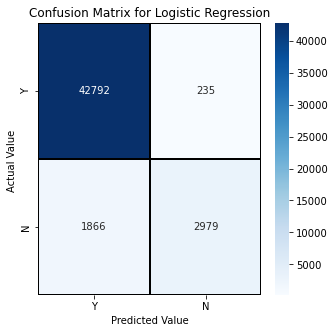

In [145]:
cm = confusion_matrix(y_test, pred)

x_axis_labels = ["Y","N"]
y_axis_labels = ["Y","N"]

f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value ")
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

### Here the final model gives 95% accuracy after tuning.

#### ROC-AUC Curve

In [146]:
fpr, tpr, threshold = roc_curve(y_test,pred)
auc = roc_auc_score(y_test,pred)

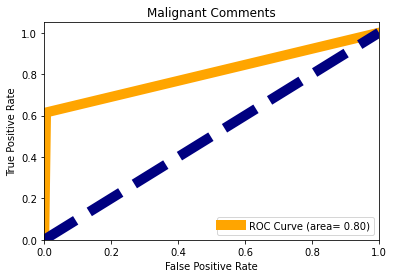

In [147]:
plt.figure()
plt.plot(fpr,tpr,color="orange",lw=10,label="ROC Curve (area= %0.2f)" % auc)
plt.plot([0,1],[0,1],color="navy",lw=10,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Malignant Comments")
plt.legend(loc="lower right")
plt.show()

### This is the AUC-ROC curve for the models which is plotted False positive rate against True positive rate. So the best model has the area under curve as 0.81.

### The Logistic Regression with RandomizedSearchCV


In [148]:
from sklearn.model_selection import RandomizedSearchCV
param =      {'warm_start':[True,False],
            'dual':[True,False],
              'random_state':[50,70,100]}

In [149]:
rand_search = RandomizedSearchCV(lr,param_distributions=param,cv=2)

In [150]:
rand_search.fit(x_train,y_train)

RandomizedSearchCV(cv=2, estimator=LogisticRegression(),
                   param_distributions={'dual': [True, False],
                                        'random_state': [50, 70, 100],
                                        'warm_start': [True, False]})

In [151]:
rand_search.best_params_

{'warm_start': False, 'random_state': 70, 'dual': False}

In [152]:
lr= LogisticRegression(warm_start=True,random_state=100,dual=False)
lr.fit(x_train,y_train)

y_pred1= lr.predict(x_test)

In [153]:
print(" Accuracy score :",accuracy_score(y_test,y_pred1),
      "\n","="*80,
      "\n Cross_validation_Score :", cross_val_score(lr,x,y,cv=5).mean(),
      "\n","="*80,
      "\n Classification report :\n",classification_report(y_test,y_pred1),
     "="*80,
      "\n Confusion matrix :\n",confusion_matrix(y_test,y_pred1))

 Accuracy score : 0.9561121323529411 
 Cross_validation_Score : 0.9560634429060688 
 Classification report :
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     43027
           1       0.93      0.61      0.74      4845

    accuracy                           0.96     47872
   macro avg       0.94      0.80      0.86     47872
weighted avg       0.96      0.96      0.95     47872
 Confusion matrix :
 [[42792   235]
 [ 1866  2979]]


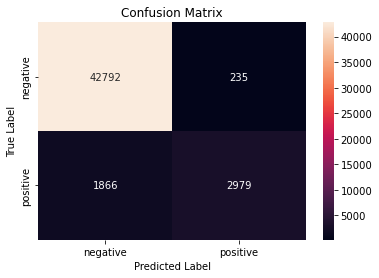

In [154]:
conf_mat = confusion_matrix(y_test, y_pred1)
class_label = ["negative", "positive"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(df, annot = True,fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### Here the final model gives 95% accuracy after tuning.

#### ROC-AUC Curve

In [155]:
fpr, tpr, threshold = roc_curve(y_test,y_pred1)
auc = roc_auc_score(y_test,y_pred1)

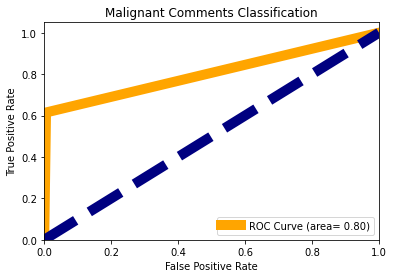

In [156]:
plt.figure()
plt.plot(fpr,tpr,color="orange",lw=10,label="ROC Curve (area= %0.2f)" % auc)
plt.plot([0,1],[0,1],color="navy",lw=10,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Malignant Comments Classification")
plt.legend(loc="lower right")
plt.show()

### This is the AUC-ROC curve for the models which is plotted False positive rate against True positive rate. So the best model has the area under curve as 0.81.

#### We can see both method of hypertunning is giving same result. So, we can proceed with any one and here proceeding with The Logistic Regression with RandomizedSearchCV.

##### Saving the Model

In [157]:
filename='Malignant_Comments_Classification.pickle'
pickle.dump(lr,open(filename,'wb'))
loaded_model = pickle.load(open(filename, 'rb'))

### Checking predicted and original values


In [158]:
a =np.array(y_test)
predicted=np.array(loaded_model.predict(x_test))
Malignant_Comments_Classification=pd.DataFrame({'Orginal':a,'Predicted':predicted}, index=range(len(a)))
Malignant_Comments_Classification

,Orginal,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,1,1
...,...,...
47867,0,0
47868,0,0
47869,0,0
47870,0,0


#### Verifying Model on Testing Data


In [159]:
#test data (comments) converted to vectors
testing_data = tf_vec.fit_transform(cmnt_test["comment_text"])

In [160]:
prediction=lr.predict(testing_data)
prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [161]:
cmnt_test['label'] = prediction
cmnt_test.head()

,comment_text,length,clean_cmnt_test,label
0,yo bitch ja rule is more succesful then you ll...,367,365,0
1,from rfc the title is fine as it is imo,50,46,0
2,sources zawe ashton on lapland,54,38,0
3,if you have a look back at the source the inf...,205,203,0
4,i don t anonymously edit articles at all,41,40,0


### Saving Testing Data


In [162]:
cmnt_test.to_csv('Malignant_Test.csv',index=False)